# The Network

For this one, we'll use the networkx package to visualize network data.

https://networkx.github.io/

In this notebook, we'll do some simple things with graphs!

Modified by: A. Iliev - Dec.03.2018

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# You will need to install 'networkx'
import networkx as nx

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# A small demo of networkx; plotting graphs with it. 
# Example: imagine you have to go to a BDay party, but need to buy a present first:
G = nx.Graph()

G.add_node('You')
G.add_node('Go to\n birthday\n party!')
G.add_node('Buy present\n from store')
G.add_edge('You', 'Buy present\n from store')
G.add_edge('Buy present\n from store', 'Go to\n birthday\n party!')

In [3]:
# Getting an adjacency matrix from the graph object

print("Node set: ", G.nodes())
print(nx.adjacency_matrix(G).toarray())

Node set:  ['You', 'Go to\n birthday\n party!', 'Buy present\n from store']
[[0 0 1]
 [0 0 1]
 [1 1 0]]


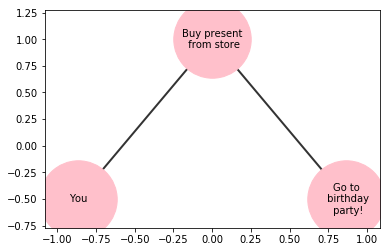

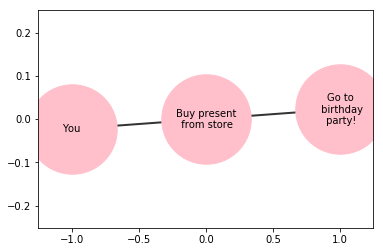

In [4]:
# plotting a graph

def nice_graph_plot(G, node_size=1000, edge_width=2, font_size=10, layout="spectral"):
    if layout == "spectral":
        node_position = nx.spectral_layout(G)
    elif layout == "spring":
        node_position = nx.spring_layout(G)
    else:
        print("No valid layout provided")
    
    nx.draw_networkx_nodes(G, node_position, node_size=node_size, alpha=1, node_color='pink')
    nx.draw_networkx_edges(G, node_position, width=edge_width, alpha=.8, edge_color='black')
    nx.draw_networkx_labels(G, node_position, font_size=font_size, font_family='sans-serif')
    
    plt.show()
    
nice_graph_plot(G, 6000)
nice_graph_plot(G, 8000, layout="spring")

# Graphs from an adjacency matrix

### Task 1. Write a function that makes a networkx graph object from an adjacency matrix.

Assume that the adjacency matrix is for an undirected graph; that is, the matrix is symmetric.

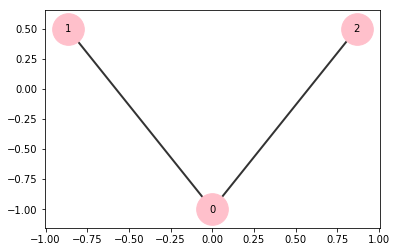

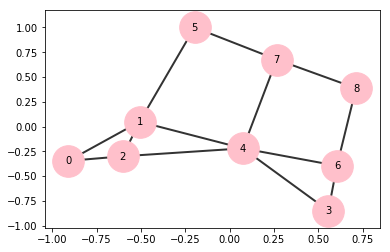

In [42]:
# 1.1 a simple test adjacency matrix
A = np.array([[0, 1, 1], 
              [1, 0, 0],
              [1, 0, 0]])

# 1.2 a not so simple adjacency matrix
B = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 1, 1, 0, 0, 0],
              [1, 1, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 1, 1, 1, 0, 0, 1, 1, 0],
              [0, 1, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 1, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 1, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 1, 1, 0]])

def adj_to_graph(A):
    n_nodes = A.shape[0]
    
# your code here:

# ... first create your undirected graph object Graph()
# ... add all nodes to the Graph object
# ... add the edges based on adjacency matrix connectivity
# ... return the graph

GA = adj_to_graph(A)
nice_graph_plot(GA)

GB = adj_to_graph(B)
nice_graph_plot(GB)

# Degree from an adjecency matrix

### Task2. Write a function to compute the degree of each node from a matrix.

Assume again you have an undirected graph's adjacency matrix.

Use the make_degree_dist_histogram to plot the degree distribution

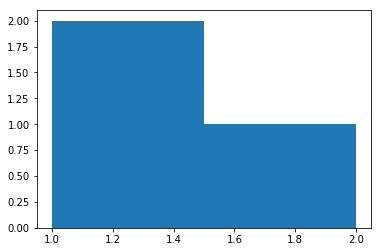

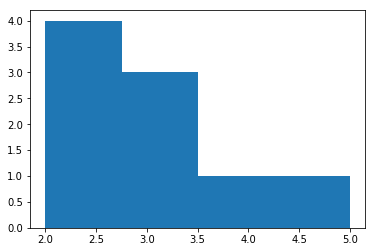

In [43]:
def make_degree_dist_histogram(degrees):
    '''degrees is assumed to be numpy array of degrees of nodes'''
# ... your code here

def get_degree(A):
    return # ... your code here

make_degree_dist_histogram(get_degree(A))
print(A.sum(0))
make_degree_dist_histogram(get_degree(B))
print(B.sum(0))

# Random graphs

networkx has a few random graph generators, lets try them out!

Look at the random graphs here:
https://networkx.github.io/documentation/latest/reference/generators.html

Some interesting ones:

1. barbell_graph is a cute fixed one
2. erdos-renyi graphs https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model Here, we draw edges at random between edges, giving a certain degree distribution. Does this graph look like anything real?
3. watts_strogatz_graph https://en.wikipedia.org/wiki/Watts_and_Strogatz_model This graph makes 'small world' graphs.
4. barabasi_albert_graph https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model This makes graphs with power law distributions, which is something we observe a lot in real social networks (e.g. consider the graph of Twitter users)

BARBELL


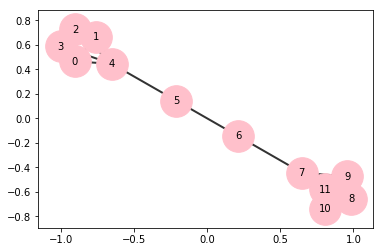

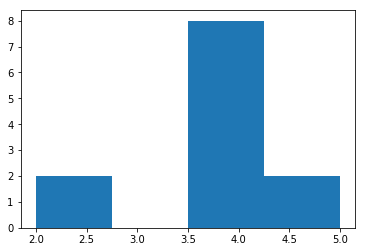

ERDOS-RENYI


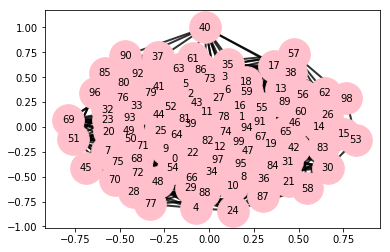

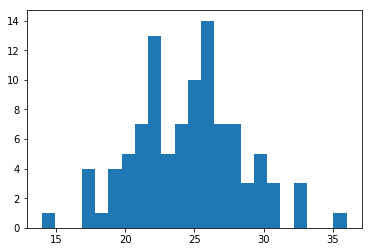

LOBSTER


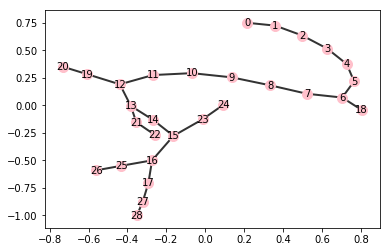

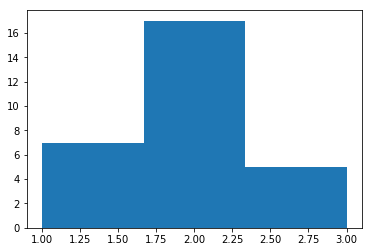

WATTS-STROGATZ


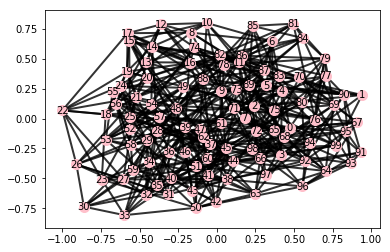

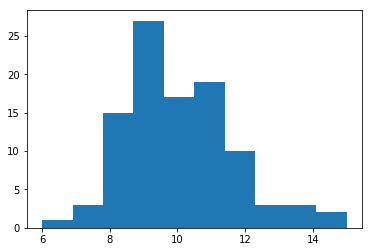

BARABASI-ALBERT


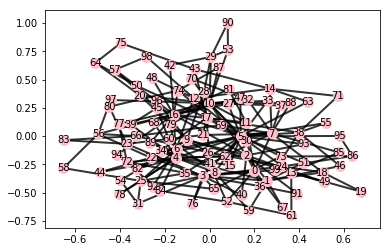

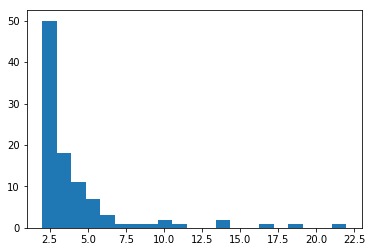

In [44]:
print("BARBELL")
GBB = nx.barbell_graph(5, 2)
print(nx.adjacency_matrix(GBB).toarray())
print(nx.adjacency_matrix(GBB).toarray().sum(0))
nice_graph_plot(GBB, layout="spring")
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GBB).toarray()))

print("ERDOS-RENYI")
GER = nx.fast_gnp_random_graph(100, 0.25)
print(nx.adjacency_matrix(GER).toarray())
print(nx.adjacency_matrix(GER).toarray().sum(0))
nice_graph_plot(GER, layout="spring")
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GER).toarray()))

print("LOBSTER")
GLOB = nx.random_lobster(10, 0.25, 0.75)
print(nx.adjacency_matrix(GLOB).toarray())
print(nx.adjacency_matrix(GLOB).toarray().sum(0))
nice_graph_plot(GLOB, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GLOB).toarray()))

print("WATTS-STROGATZ")
GWS = nx.watts_strogatz_graph(100, 10, .4)
print(nx.adjacency_matrix(GWS).toarray())
print(nx.adjacency_matrix(GWS).toarray().sum(0))
nice_graph_plot(GWS, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GWS).toarray()))

print("BARABASI-ALBERT")
GBA = nx.barabasi_albert_graph(100, 2)
print(nx.adjacency_matrix(GBA).toarray())
print(nx.adjacency_matrix(GBA).toarray().sum(0))
nice_graph_plot(GBA, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GBA).toarray()))


# Closeness

### Task 3: Implement a measure of closeness. For example: the average length of paths to all other nodes in the network.

Hint: the adjacency matrix for two steps is given by the adjacency matrix squared, e.g.:

np.dot(A, A)

This generalizes to any number of steps.

Plot closeness distributions for some random graphs.

BARBELL


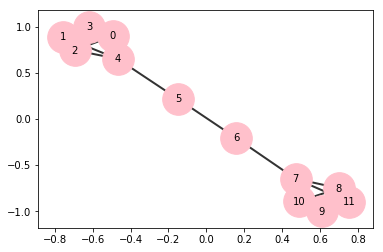

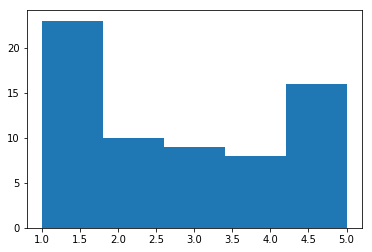

ERDOS-RENYI


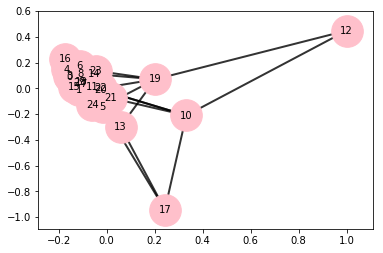

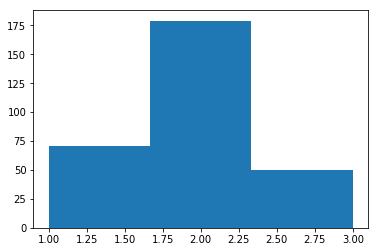

LOBSTER


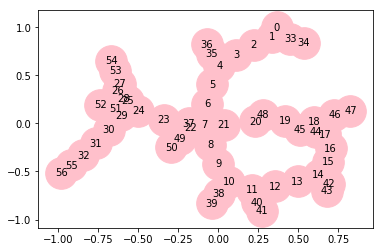

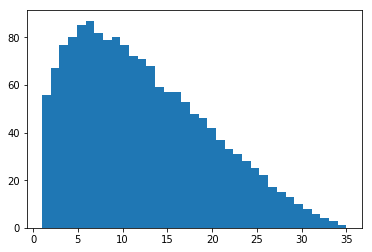

WATTS-STORGATZ


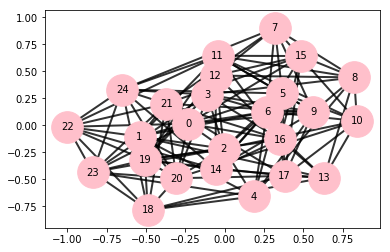

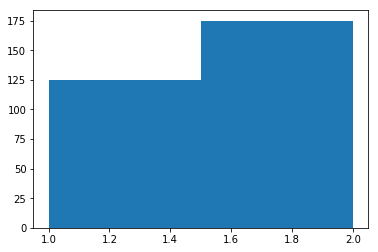

BARABASI-ALBERT


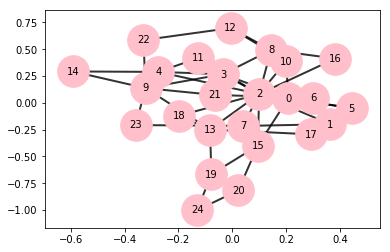

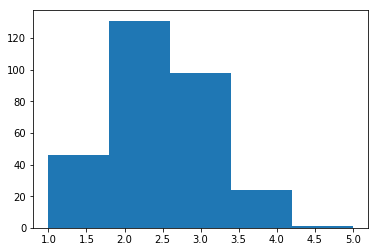

In [45]:
def distance_to_other_node(A, i, j):
    steps = 1
    if A[i, j] > 0:
        return steps
    
    B = A
    for s in range(A.shape[0]):
        steps += 1
        B = np.dot(B, A)
        if B[i, j] > 0:
            return steps
    
    # indicates there is no path from i to j
    return 0

def closeness(A):
# ... your code here

print("BARBELL")
GBB = nx.barbell_graph(5, 2)
# ... your code here: plot the graph
# ... your code here: plot the histogram

print("ERDOS-RENYI")
GER = nx.fast_gnp_random_graph(25, 0.25)
# ... your code here: plot the graph
# ... your code here: plot the histogram

print("LOBSTER")
GLOB = nx.random_lobster(25, 0.25, 0.75)
# ... your code here: plot the graph
# ... your code here: plot the histogram

print("WATTS-STORGATZ")
GWS = nx.watts_strogatz_graph(25, 10, .4)
# ... your code here: plot the graph
# ... your code here: plot the histogram

print("BARABASI-ALBERT")
GBA = nx.barabasi_albert_graph(25, 2)
# ... your code here: plot the graph
# ... your code here: plot the histogram
